In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [198]:
# Generate synthetic data - Binary class
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2)

# Test-Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(X_train.shape,y_train.shape)

(700, 2) (700,)


In [140]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([345, 355], dtype=int64))

### Gaussian Discriminant Analysis from scratch

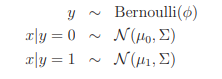

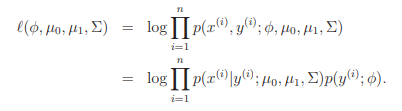

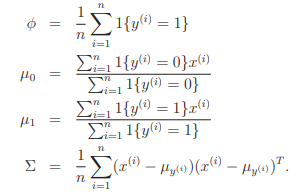

In [150]:
def fit_gda(X,y):
    '''
    Parameters
    ----------
    X : shape (n_samples, n_features)
        Training data
    y : shape (n_samples,)
        Target labels
    '''
    n_samples,n_features=X.shape
    classes = np.unique(y)
    n_classes = len(np.unique(y))

    phi = np.zeros((n_classes,1))
    means = np.zeros((n_classes,n_features))
    cov = 0

    for i in range(n_classes):
        idx = np.where(y==classes[i])[0]

        phi[i] = len(idx)/n_samples
        means[i] = np.mean(X[idx],axis=0) 
        cov += np.cov(X[idx].T)*(len(idx) - 1)

    cov /= n_samples
    
    return(phi,means,cov)

In [153]:
phi,means,cov = fit_gda(X_train,y_train)

print("phi-values: ",phi)
print("Mean-values: ",means)
print("CoV-values: ",cov)

phi-values:  [[0.49285714]
 [0.50714286]]
Mean-values:  [[ 0.01149407 -0.88795888]
 [ 0.02314088  1.01766433]]
CoV-values:  [[1.36974643 0.24189533]
 [0.24189533 0.82478297]]


Prior Probabilities

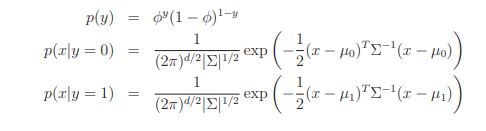

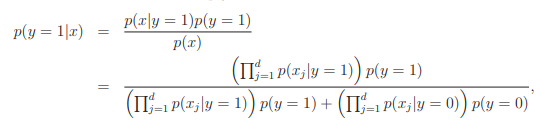

In [171]:
from scipy.stats import multivariate_normal

def calc_prob_y(X,phi,mean,cov):
    '''
    Parameters
    ----------
    X : shape (n_samples, n_features)
        Predicting data
    Returns
    -------
    y : shape (n_samples,)
        Predicted class label per sample.
    '''
    pdf = lambda mean: multivariate_normal.pdf(X,mean,cov)  
    p_y = np.apply_along_axis(pdf,1,means) * phi
    
    return(p_y)

prob_y = calc_prob_y(X_test,phi,means,cov)
classes = np.unique(y_train)
pred_class = classes[np.argmax(prob_y,axis = 0)]

### Linear Discriminant Analysis from scratch

Assumption that both the distributions has same variance

In [179]:
def fit_lda(X,y):
    '''
    Parameters
    ----------
    X : shape (n_samples, n_features)
        Training data
    y : shape (n_samples,)
        Target labels
    '''
    n_samples,n_features=X.shape
    classes = np.unique(y)
    n_classes = len(np.unique(y))

    phi = np.zeros((n_classes,1))
    means = np.zeros((n_classes,n_features))
    cov = np.zeros((n_features,n_features))

    for i in range(n_classes):
        idx = np.where(y==classes[i])[0]

        phi[i] = len(idx)/n_samples
        means[i] = np.mean(X[idx],axis=0) 
    
    cov += np.var(X[idx,0])*np.identity(n_features)
    
    return(phi,means,cov)

In [180]:
phi,means,cov = fit_lda(X_train,y_train)

print("phi-values: ",phi)
print("Mean-values: ",means)
print("CoV-values: ",cov)

phi-values:  [[0.49285714]
 [0.50714286]]
Mean-values:  [[ 0.01149407 -0.88795888]
 [ 0.02314088  1.01766433]]
CoV-values:  [[1.15331044 0.        ]
 [0.         1.15331044]]


In [187]:
prob_y = calc_prob_y(X_test,phi,means,cov)
classes = np.unique(y_train)
pred_class = classes[np.argmax(prob_y,axis = 0)]

confusion_matrix(y_test,pred_class)

array([[135,  20],
       [ 11, 134]], dtype=int64)

### Linear discriminant Analysis using sklearn

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
pred_sklrn = clf.predict(X_test)

confusion_matrix(y_test,pred_class)

array([[135,  20],
       [ 11, 134]], dtype=int64)

### Quadratic discriminant Analysis from scratch 

In [206]:
def fit_qda(X,y):
    '''
    Parameters
    ----------
    X : shape (n_samples, n_features)
        Training data
    y : shape (n_samples,)
        Target labels
    '''
    n_samples,n_features=X.shape
    classes = np.unique(y)
    n_classes = len(np.unique(y))

    phi = np.zeros((n_classes,1))
    means = np.zeros((n_classes,n_features))
    cov = np.zeros((n_features,n_features))

    for i in range(n_classes):
        idx = np.where(y==classes[i])[0]

        phi[i] = len(idx)/n_samples
        means[i] = np.mean(X[idx],axis=0) 
    
    np.fill_diagonal(cov, [np.var(X_train[idx,0]),np.var(X_train[idx,1])])
    
    return(phi,means,cov)

In [207]:
phi,means,cov = fit_qda(X_train,y_train)

print("phi-values: ",phi)
print("Mean-values: ",means)
print("CoV-values: ",cov)

phi-values:  [[0.51]
 [0.49]]
Mean-values:  [[-1.03362428 -0.01113369]
 [ 0.97747756 -0.01734089]]
CoV-values:  [[1.73091939 0.        ]
 [0.         1.64875324]]


In [208]:
prob_y = calc_prob_y(X_test,phi,means,cov)
classes = np.unique(y_train)
pred_class = classes[np.argmax(prob_y,axis = 0)]

confusion_matrix(y_test,pred_class)

array([[133,   8],
       [ 28, 131]], dtype=int64)

### Quadratic discriminant Analysis from scratch 

In [209]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
pred_sklrn = clf.predict(X_test)

confusion_matrix(y_test,pred_class)

array([[133,   8],
       [ 28, 131]], dtype=int64)